[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/06_population_multiple/predator_prey.ipynb)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Predator–prey model: version 1
# See 'MultiSpecies_lecturenotes2.pdf'
def rhs472(t, X, a1, a2, b1, b2): 
    """Define the differential equation of 4.72

    Args:
        t (float): time
        X (numpy.ndarray): population
        a1 (float): parameter value
        a2 (float): parameter value
        b1 (float): parameter value
        b2 (float): parameter value

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    x = X[0]
    y = X[1]
    u = x * (a1 - b1*y)
    v = y * (-a2 + b2*x)
    U = [u, v]
    
    return U

In [3]:
# Predator–prey model: version 2
# See 'MultiSpecies_lecturenotes2.pdf'
def rhs474(t, X, a1, a2, b1, b2, epsilon):
    """Define the differential equation of 4.74

    Args:
        t (float): time
        X (numpy.ndarray): population
        a1 (float): parameter value
        a2 (float): parameter value
        b1 (float): parameter value
        b2 (float): parameter value
        epsilon (float): parameter value

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    x = X[0]
    y = X[1]
    u = x * ( a1*(1. - epsilon*x) - b1*y)
    v = y * (-a2 + b2*x)
    U = [u, v]
    
    return U

In [4]:
# Predator–prey model: version 3
# See 'MultiSpecies_lecturenotes2.pdf'
def rhs1024_1026(t, X, a1, a2, b1, b2, c1, K, epsilon): 
    """Define the differential equation of 10.24 and 10.26

    Args:
        t (float): time
        X (numpy.ndarray): population
        a1 (float): parameter value
        a2 (float): parameter value
        b1 (float): parameter value
        b2 (float): parameter value
        c1 (float): parameter value
        K (float): parameter value
        epsilon (float): parameter value

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    x = X[0]
    y = X[1]
    u = x*(a1*(1-x/K)-b1*c1*y/(b1*x+c1))
    v = a2*y*(1-y/(b2*x))
    U = [u, v]
    
    return U

In [5]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

Plot phase portrait of predator–prey models based on Mesterton–Gibbons

Predator–prey model: version 1

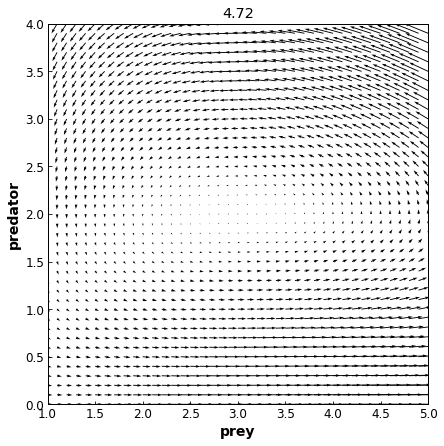

In [6]:
# Quiver of 4.72 (predator–prey model: version 1)
N = 40
x1 = 1.
x2 = 5.
dx = (x2-x1) / N

y1 = 0.
y2 = 4.
dy = (y2-y1) / N

dimx = np.size(np.arange(x1, x2+0.5*dx, dx))
dimy = np.size(np.arange(y1, y2+0.5*dy, dy))
u = np.zeros((dimx,dimy), dtype=np.float32)
v = np.zeros((dimx,dimy), dtype=np.float32)
x,y = np.meshgrid(np.arange(x1, x2+0.5*dx, dx), np.arange(y1, y2+0.5*dy, dy))

a1 = 4.
b1 = 2.
a2 = 3.
b2 = 1.

for i in range(dimx): 
    for j in range(dimy):
        X = [x[i,j], y[i,j]]
        t=0
        U = rhs472(t, X, a1, a2, b1, b2)
        u[i,j] = U[0]
        v[i,j] = U[1]
        
# Plot quiver
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=300)

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title and axes labels
ax.set_title('4.72')
ax.set_xlabel('prey')
ax.set_ylabel('predator')

plt.show()

Add phase space trajectory to 4.72 (predator–prey model: version 1)

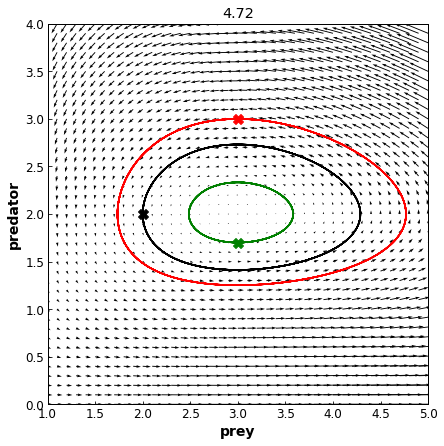

In [7]:
# Plot quiver and trajectory
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=300)

# Compute trajectory
tspan = [0., 10.]
t_eval = np.arange(0, 10, 0.01)
X0 = [2., 2.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs472, tspan, X0, args=(a1, a2, b1, b2), method='Radau', t_eval=t_eval)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='k', s=100)
ax.plot(X[0,:], X[1,:], color='k', linewidth=1.5)

tspan = [0., 10.]
t_eval = np.arange(0, 10, 0.01)
X0 = [3., 3.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs472, tspan, X0, args=(a1, a2, b1, b2), method='Radau', t_eval=t_eval)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='r', s=100)
ax.plot(X[0,:], X[1,:], color='r', linewidth=1.5)

tspan = [0., 10.]
t_eval = np.arange(0, 10, 0.01)
X0 = [3., 1.7]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs472, tspan, X0, args=(a1, a2, b1, b2), method='Radau', t_eval=t_eval)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='g', s=100)
ax.plot(X[0,:], X[1,:], color='g', linewidth=1.5)

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title and axes labels
ax.set_title('4.72')
ax.set_xlabel('prey')
ax.set_ylabel('predator')

plt.show()

Predator–prey model: version 2

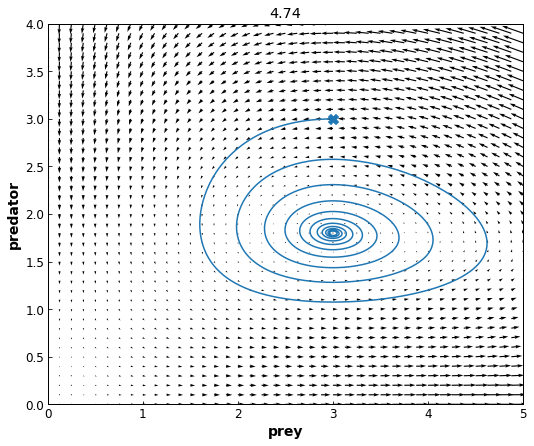

In [8]:
# Quiver of 4.74 (predator–prey model: version 2)
N = 40
x1 = 0.
x2 = 5.
dx = (x2-x1) / N

y1 = 0.
y2 = 4.
dy = (y2-y1) / N

dimx = np.size(np.arange(x1, x2+0.5*dx, dx))
dimy = np.size(np.arange(y1, y2+0.5*dy, dy))
u = np.zeros((dimx,dimy), dtype=np.float32)
v = np.zeros((dimx,dimy), dtype=np.float32)
x,y = np.meshgrid(np.arange(x1, x2+0.5*dx, dx), np.arange(y1, y2+0.5*dy, dy))

a1 = 4.
b1 = 2.
a2 = 3.
b2 = 1.
epsilon = 1./30.

for i in range(dimx): 
    for j in range(dimy):
        X = [x[i,j], y[i,j]]
        t=0
        U = rhs474(t, X, a1, a2, b1, b2, epsilon)
        u[i,j] = U[0]
        v[i,j] = U[1]
        
# Plot quiver
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=500)

# Phase space trajectory
tspan = [0., 20.]
t_eval = np.arange(0, 20, 0.01)
X0 = [3., 3.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs474, tspan, X0, args=(a1, a2, b1, b2, epsilon), method='Radau', t_eval=t_eval)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='tab:blue', s=100)
ax.plot(X[0,:], X[1,:], color='tab:blue', linewidth=1.5)

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title and axes labels
ax.set_title('4.74')
ax.set_xlabel('prey')
ax.set_ylabel('predator')

plt.show()

Predator–prey model: version 3

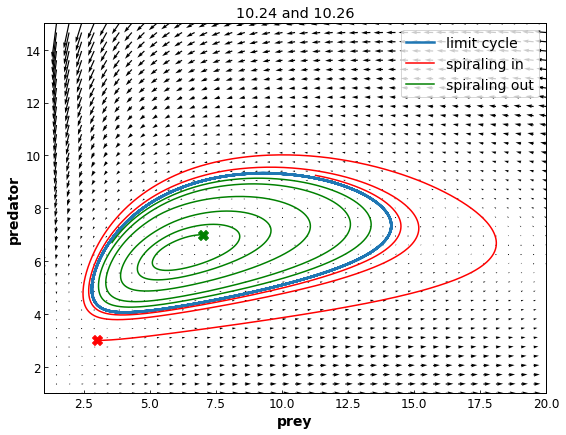

In [9]:
# Quiver of 4.74 (predator–prey model: version 2)
N = 40
x1 = 1.
x2 = 20.
dx = (x2-x1) / N

y1 = 1.
y2 = 15.
dy = (y2-y1) / N

dimx = np.size(np.arange(x1, x2+0.5*dx, dx))
dimy = np.size(np.arange(y1, y2+0.5*dy, dy))
u = np.zeros((dimx,dimy), dtype=np.float32)
v = np.zeros((dimx,dimy), dtype=np.float32)
x,y = np.meshgrid(np.arange(x1, x2+0.5*dx, dx), np.arange(y1, y2+0.5*dy, dy))

lam = 5.
mu = 0.15
theta = 10.
a2 = 1. # equivalent to rescaling y 
K = 30. # carrying capacity of prey w/o predator 
# Using the non dim parameters that are specified in the textbook to calculate the dimensional parameters:
c1 = np.sqrt(theta*mu*a2*K) # from multiplying theta & mu eqns
a1 = lam*a2
b1 = theta*a2/c1

for i in range(dimx): 
    for j in range(dimy):
        X = [x[i,j], y[i,j]]
        t=0
        U = rhs1024_1026(t, X, a1, a2, b1, b2, c1, K, epsilon)
        u[i,j] = U[0]
        v[i,j] = U[1]
        
# Plot quiver
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=2000)

# Phase space trajectory
tspan = [0., 50.]
t_eval = np.arange(0, 50, 0.01)
X0 = [3., 3.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs1024_1026, tspan, X0, args=(a1, a2, b1, b2, c1, K, epsilon), method='Radau', t_eval=t_eval)
# Unpack solution
T, X = sol.t, sol.y
M = np.size(X[0,:])
# Plot only the limit cycle (by starting after the time series converged to it):
ax.plot(X[0,np.int32(np.floor(0.5*M)):M], X[1,np.int32(np.floor(0.5*M)):M], linewidth=2.5, label='limit cycle')
# Plot start point and trajectory spiraling in into the limit cycle: 
ax.scatter(X0[0], X0[1], marker='X', color='r', s=100)
ax.plot(X[0,:np.int32(np.floor(0.2*M))], X[1,:np.int32(np.floor(0.2*M))], color='r', linewidth=1.5, label='spiraling in')

# Integrate and plot trajectory spiraling out to the limit cycle:
tspan = [0., 20.]
t_eval = np.arange(0., 20., 0.01)
X0 = [7., 7.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs1024_1026, tspan, X0, args=(a1, a2, b1, b2, c1, K, epsilon), t_eval=t_eval)
# Unpack solution
T, X = sol.t, sol.y
M = np.size(X[0,:])
# Plot start point and trajectory spiraling outward
ax.scatter(X0[0], X0[1], marker='X', color='g', s=100)
ax.plot(X[0,:], X[1,:], color='g', linewidth=1.5, label='spiraling out')

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title, axes labels and legend
ax.set_title('10.24 and 10.26')
ax.set_xlabel('prey')
ax.set_ylabel('predator')
ax.legend(loc='upper right')

plt.show()